<a href="https://colab.research.google.com/github/iainwo/life-of-iain/blob/main/0_1_1_method_of_exhaustion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Basic Concepts of Calc

1. measure the aread of a regon
2. measure steepness of line

# Method of Exhaustion

## Method

Historical method by greeks, consisting of:

1. find a region to measure
2. approximate the region of #1 with a easily measured polygon
3. improve the approximation by increasing the number of sides on the polygon
4. repeat

## Method for Parabolic Segments

### Approximations

In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# number of points
n = 50

# parabola
f = lambda x: x**2
x = np.linspace(0, 10, n)
y = f(x)

# ordinates
xi = np.full((n), 5)
ordinate_i = np.linspace(0, f(xi[-1]), n)

xj = np.full((n), 10)
ordinate_j = np.linspace(0, f(xj[-1]), n)

# region approximations
f_lb = lambda x: np.floor(x)**2 # lower bound
y_lb = f_lb(x)

f_ub = lambda x: np.ceil(x)**2 # upper bound
y_ub = f_ub(x)

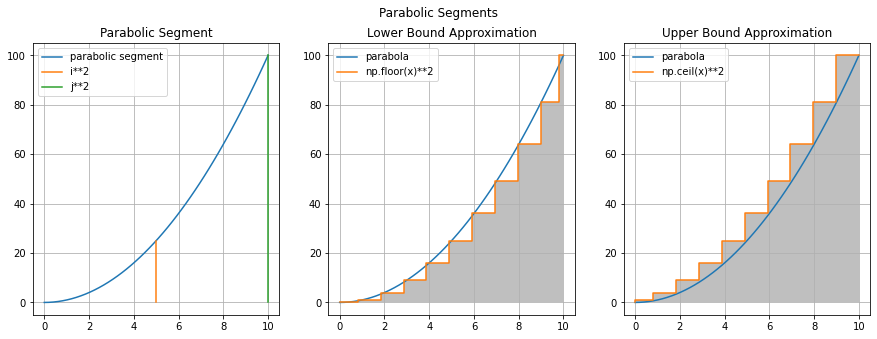

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Parabolic Segments')

# parabolic segment subplot
ax[0].plot(x, y, label="parabolic segment")
ax[0].plot(xi, ordinate_i, label="i**2")
ax[0].plot(xj, ordinate_j, label="j**2")
ax[0].set_title("Parabolic Segment")
ax[0].grid(True)
ax[0].legend()

# lower bound region approximation
ax[1].plot(x, y, label="parabola")
ax[1].plot(x, y_lb, label="np.floor(x)**2", drawstyle='steps-pre')
ax[1].set_title("Lower Bound Approximation")
ax[1].fill_between(x, y_lb, alpha=0.5, facecolor="gray", step="pre")
ax[1].grid(True)
ax[1].legend()

# upper bound region approximation
ax[2].plot(x, y, label="parabola")
ax[2].plot(x, y_ub, label="np.ceil(x)**2", drawstyle='steps-pre')
ax[2].set_title("Upper Bound Approximation")
ax[2].fill_between(x, y_ub, alpha=0.5, facecolor="gray", step="pre")
ax[2].grid(True)
ax[2].legend()

plt.show()

### Measuring Approximations

In [85]:
# cut approximation into rectangles - below are a few, not all

width = 50//10

# rectangle 2
x_r2 = x[width: 2*width]
y_r2 = f_ub(x_r2)

# rectangle 3
x_r3 = x[2*width: 3*width]
y_r3 = f_ub(x_r3)

# rectangle 1
x_r1 = x[5*width: 6*width]
y_r1 = f_ub(x_r1)

In [87]:
# create logical axis
x_log = np.arange(10)
x_log_labels = [f"{i}i/n" for i in x_log]

y_log = f(x_log)
y_log_labels = [f"({i}i/n)**2" for i in x_log]

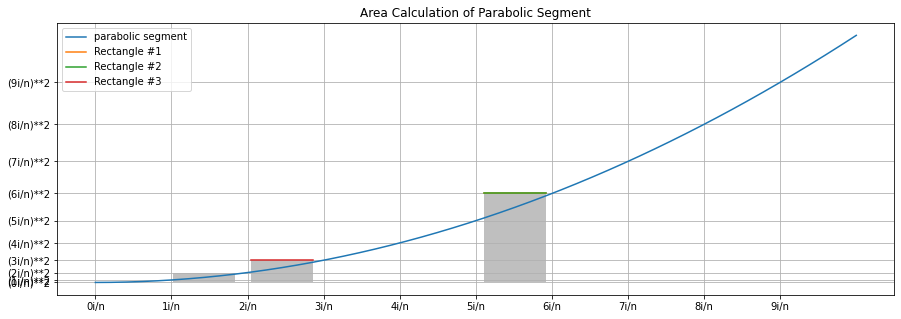

In [88]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="parabolic segment")

# rectangle 1
plt.plot(x_r1, y_r1, label="Rectangle #1", drawstyle='steps-pre')
plt.fill_between(x_r1, y_r1, alpha=0.5, facecolor="gray", step="pre")

# rectangle 2
plt.plot(x_r1, y_r1, label="Rectangle #2", drawstyle='steps-pre')
plt.fill_between(x_r2, y_r2, alpha=0.5, facecolor="gray", step="pre")

# rectangle 3
plt.plot(x_r3, y_r3, label="Rectangle #3", drawstyle='steps-pre')
plt.fill_between(x_r3, y_r3, alpha=0.5, facecolor="gray", step="pre")

plt.xticks(x_log, x_log_labels)
plt.yticks(y_log, y_log_labels)

plt.title("Area Calculation of Parabolic Segment")
plt.grid(True)
plt.legend()
plt.show()